In [1]:
from datasets import load_dataset

ds = load_dataset(
    "CADCODER/GenCAD-Code",
    num_proc=16,
    split=["train", "test"],
    cache_dir="./Volumes/BIG-DATA/HUGGINGFACE_CACHE",
)

In [2]:
ds

[Dataset({
     features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset'],
     num_rows: 147289
 }),
 Dataset({
     features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset'],
     num_rows: 7355
 })]

In [3]:
ds[0][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448>,
 'deepcad_id': '0000/00006371',
 'cadquery': 'import cadquery as cq\n# Generating a workplane for sketch 0\nwp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))\nloop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()\nsolid0=wp_sketch0.add(loop0).extrude(0.75)\nsolid=solid0\n',
 'token_count': 1292,


# CAD Dataset Exploration: GenCAD-Code Dataset

This notebook provides a comprehensive exploration of the **GenCAD-Code** dataset from CADCODER, which contains CAD images paired with their corresponding CadQuery code for **image-to-code** generation tasks.

## Dataset Overview
- **Training set**: 147,289 examples
- **Test set**: 7,355 examples
- **Features**: image, deepcad_id, cadquery, token_count, prompt, hundred_subset

**Important Discovery**: All prompts are identical - "Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words." This is an **image-to-code** dataset, not a text-to-code dataset!

Let's explore the dataset focusing on **image diversity** and **code complexity** patterns.

In [4]:
# Let's examine the dataset structure more clearly
train_dataset, test_dataset = ds
print("🔍 Dataset Structure Analysis")
print("=" * 50)
print(f"Training samples: {len(train_dataset):,}")
print(f"Test samples: {len(test_dataset):,}")
print(f"Total samples: {len(train_dataset) + len(test_dataset):,}")
print(f"\nFeatures: {list(train_dataset.features.keys())}")
print(f"\nFeature types:")
for feature, dtype in train_dataset.features.items():
    print(f"  • {feature}: {dtype}")

# Check if all prompts are the same
print(f"\n🔍 Prompt Analysis:")
unique_prompts = set(sample['prompt'] for sample in list(test_dataset)[:100])
print(f"Unique prompts in first 100 samples: {len(unique_prompts)}")
if len(unique_prompts) == 1:
    print(f"⚠️  All prompts are identical: '{list(unique_prompts)[0]}'")
    print("This is an IMAGE-TO-CODE dataset, not text-to-code!")

🔍 Dataset Structure Analysis
Training samples: 147,289
Test samples: 7,355
Total samples: 154,644

Features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset']

Feature types:
  • image: Image(mode=None, decode=True, id=None)
  • deepcad_id: Value(dtype='string', id=None)
  • cadquery: Value(dtype='string', id=None)
  • token_count: Value(dtype='int64', id=None)
  • prompt: Value(dtype='string', id=None)
  • hundred_subset: Value(dtype='bool', id=None)

🔍 Prompt Analysis:
Unique prompts in first 100 samples: 1
⚠️  All prompts are identical: 'Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words.'
This is an IMAGE-TO-CODE dataset, not text-to-code!
Unique prompts in first 100 samples: 1
⚠️  All prompts are identical: 'Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words.'
This is an IMAGE-TO-CODE dataset, not text-to-code!


In [5]:
# Let's examine a sample record in detail
import json

sample = test_dataset[0]
print("📋 Sample Record Analysis")
print("=" * 50)
print(f"DeepCAD ID: {sample['deepcad_id']}")
print(f"Token Count: {sample['token_count']:,}")
print(f"Hundred Subset: {sample['hundred_subset']}")
print(f"Image: {type(sample['image'])} - {sample['image'].size}")

print(f"\n📝 Prompt (identical for all samples):")
print("-" * 30)
print(f"'{sample['prompt']}'")

print(f"\n🔧 CadQuery Code (first 800 chars):")
print("-" * 30)
print(sample['cadquery'][:800] + "..." if len(sample['cadquery']) > 800 else sample['cadquery'])

print(f"\n🔍 Key Insight:")
print("This dataset is designed for IMAGE-TO-CODE generation, where:")
print("• Input: CAD image (448x448 pixels)")
print("• Output: CadQuery code to recreate that CAD model")
print("• All prompts are identical - they're just instructions for the task")

📋 Sample Record Analysis
DeepCAD ID: 0000/00009254
Token Count: 1,050
Hundred Subset: False
Image: <class 'PIL.PngImagePlugin.PngImageFile'> - (448, 448)

📝 Prompt (identical for all samples):
------------------------------
'Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words.'

🔧 CadQuery Code (first 800 chars):
------------------------------
import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, -0.75, -0.75), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(1.5, 0.0).lineTo(1.5, 1.5).lineTo(0.0, 1.5).lineTo(0.0, 0.0).close()
loop1=wp_sketch0.moveTo(0.7578947368421053, 0.5368421052631579).circle(0.14210526315789473)
loop2=wp_sketch0.moveTo(0.7578947368421053, 0.9315789473684211).circle(0.14210526315789473)
solid0=wp_sketch0.add(loop0).add(loop1).add(loop2).extrude(0.03125)
solid=solid0


🔍 Key I

In [6]:
# Statistical Analysis of the Dataset (focusing on what actually varies)
import numpy as np
from collections import Counter

print("📊 Statistical Analysis")
print("=" * 50)

# Verify all images are the same size
print("🖼️ Image Characteristics:")
sample_images = [test_dataset[i]['image'] for i in range(min(50, len(test_dataset)))]
image_sizes = [img.size for img in sample_images]
unique_sizes = set(image_sizes)
print(f"  • All images same size: {len(unique_sizes) == 1}")
print(f"  • Image dimensions: {list(unique_sizes)[0] if len(unique_sizes) == 1 else 'Mixed sizes'}")

# Token count statistics (this actually varies!)
token_counts = [item['token_count'] for item in test_dataset]
print(f"\n🔧 CadQuery Code Token Statistics:")
print(f"  • Mean: {np.mean(token_counts):.1f}")
print(f"  • Median: {np.median(token_counts):.1f}")
print(f"  • Min: {np.min(token_counts):,}")
print(f"  • Max: {np.max(token_counts):,}")
print(f"  • Std Dev: {np.std(token_counts):.1f}")

# Hundred subset distribution
hundred_subset_count = sum(1 for item in test_dataset if item['hundred_subset'])
print(f"\n📊 Hundred Subset Distribution:")
print(f"  • In hundred subset: {hundred_subset_count:,} ({hundred_subset_count/len(test_dataset)*100:.1f}%)")
print(f"  • Not in hundred subset: {len(test_dataset)-hundred_subset_count:,} ({(len(test_dataset)-hundred_subset_count)/len(test_dataset)*100:.1f}%)")

# CadQuery code length statistics (what actually matters!)
code_lengths = [len(item['cadquery']) for item in test_dataset]
print(f"\nCadQuery Code Length Statistics (characters):")
print(f"  • Mean: {np.mean(code_lengths):.1f}")
print(f"  • Median: {np.median(code_lengths):.1f}")
print(f"  • Min: {np.min(code_lengths):,}")
print(f"  • Max: {np.max(code_lengths):,}")
print(f"  • Std Dev: {np.std(code_lengths):.1f}")

# Find examples of different complexity levels
print(f"\n🎯 Code Complexity Examples:")
sorted_by_tokens = sorted(enumerate(test_dataset), key=lambda x: x[1]['token_count'])
print(f"  • Simplest (tokens): {sorted_by_tokens[0][1]['token_count']} - ID: {sorted_by_tokens[0][1]['deepcad_id']}")
print(f"  • Most complex (tokens): {sorted_by_tokens[-1][1]['token_count']} - ID: {sorted_by_tokens[-1][1]['deepcad_id']}")

📊 Statistical Analysis
🖼️ Image Characteristics:
  • All images same size: True
  • Image dimensions: (448, 448)
  • All images same size: True
  • Image dimensions: (448, 448)

🔧 CadQuery Code Token Statistics:
  • Mean: 1268.5
  • Median: 1085.0
  • Min: 812
  • Max: 5,079
  • Std Dev: 492.7

🔧 CadQuery Code Token Statistics:
  • Mean: 1268.5
  • Median: 1085.0
  • Min: 812
  • Max: 5,079
  • Std Dev: 492.7

📊 Hundred Subset Distribution:
  • In hundred subset: 100 (1.4%)
  • Not in hundred subset: 7,255 (98.6%)

📊 Hundred Subset Distribution:
  • In hundred subset: 100 (1.4%)
  • Not in hundred subset: 7,255 (98.6%)

CadQuery Code Length Statistics (characters):
  • Mean: 897.6
  • Median: 628.0
  • Min: 288
  • Max: 5,945
  • Std Dev: 685.6

🎯 Code Complexity Examples:

CadQuery Code Length Statistics (characters):
  • Mean: 897.6
  • Median: 628.0
  • Min: 288
  • Max: 5,945
  • Std Dev: 685.6

🎯 Code Complexity Examples:
  • Simplest (tokens): 812 - ID: 0023/00232962
  • Most com

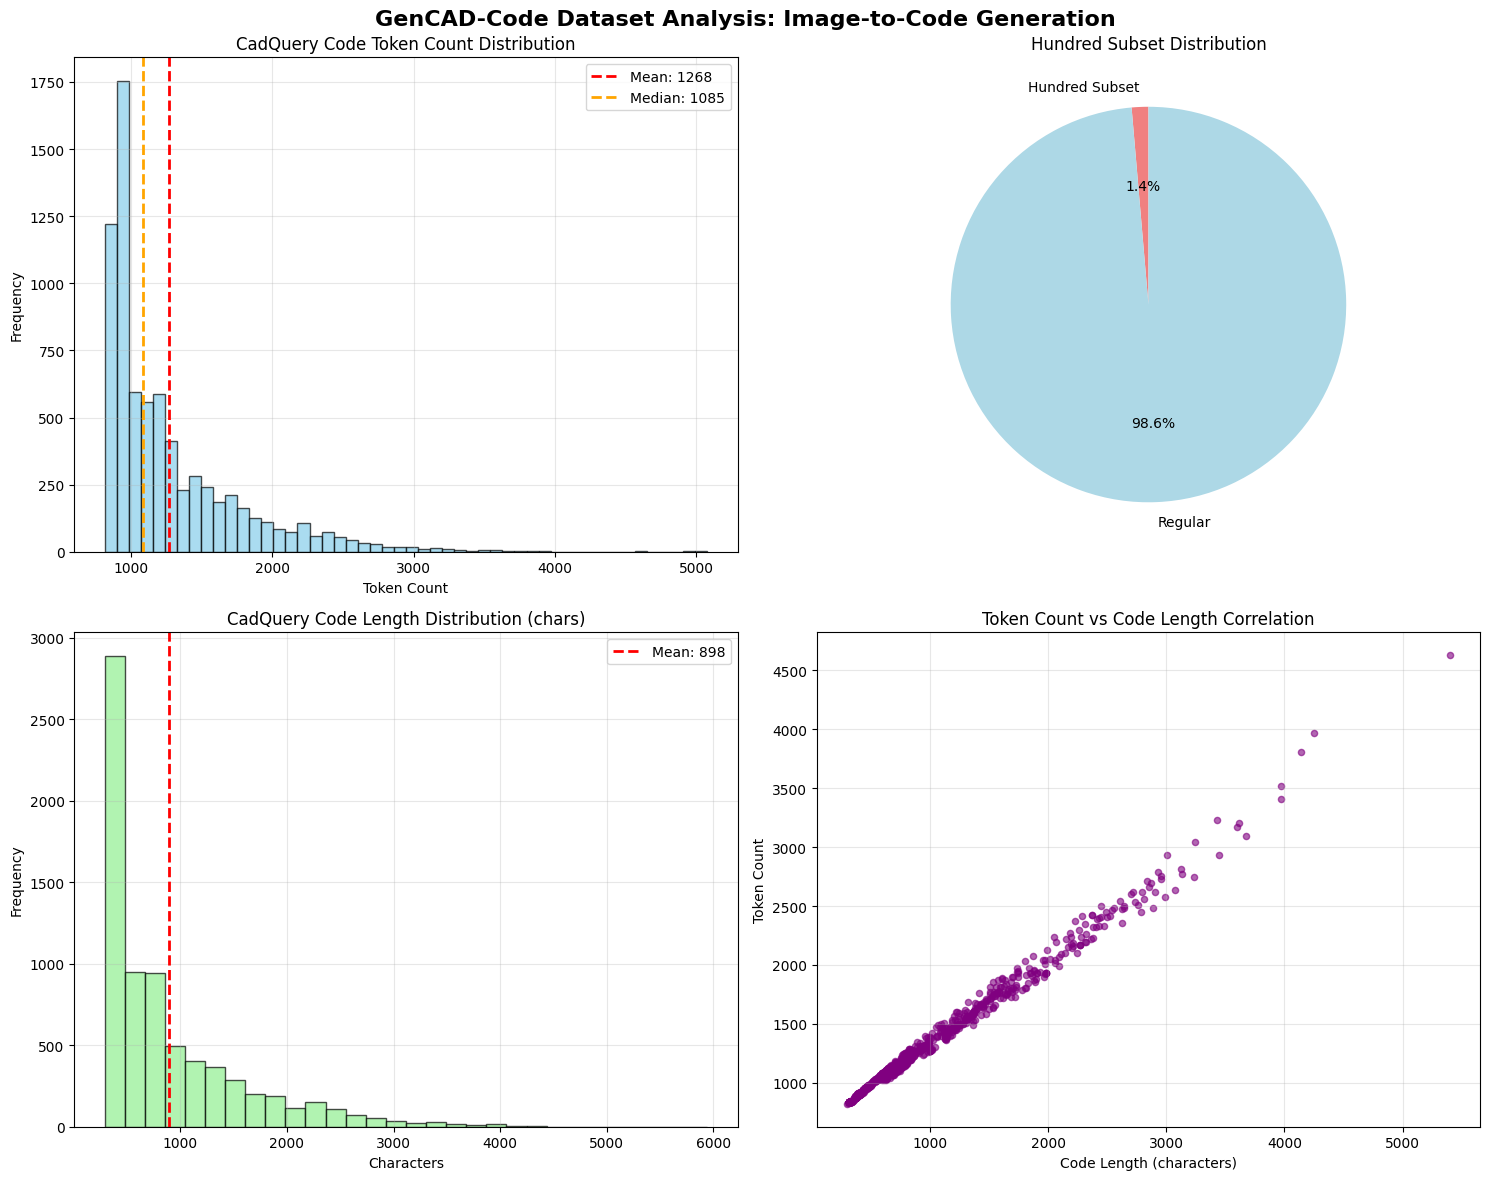

In [7]:
# Install visualization packages and create plots
import subprocess
import sys

try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    print("Installing matplotlib and seaborn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "seaborn"])
    import matplotlib.pyplot as plt
    import seaborn as sns

# Create visualizations focusing on the varying data
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('GenCAD-Code Dataset Analysis: Image-to-Code Generation', fontsize=16, fontweight='bold')

# Token count distribution
axes[0, 0].hist(token_counts, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(np.mean(token_counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(token_counts):.0f}')
axes[0, 0].axvline(np.median(token_counts), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(token_counts):.0f}')
axes[0, 0].set_title('CadQuery Code Token Count Distribution')
axes[0, 0].set_xlabel('Token Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Hundred subset pie chart
subset_counts = [hundred_subset_count, len(test_dataset)-hundred_subset_count]
labels = ['Hundred Subset', 'Regular']
colors = ['lightcoral', 'lightblue']
axes[0, 1].pie(subset_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Hundred Subset Distribution')

# Code length distribution (characters)
axes[1, 0].hist(code_lengths, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(np.mean(code_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(code_lengths):.0f}')
axes[1, 0].set_title('CadQuery Code Length Distribution (chars)')
axes[1, 0].set_xlabel('Characters')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Token vs Character length correlation
axes[1, 1].scatter([len(test_dataset[i]['cadquery']) for i in range(min(1000, len(test_dataset)))],
                   [test_dataset[i]['token_count'] for i in range(min(1000, len(test_dataset)))],
                   alpha=0.6, color='purple', s=20)
axes[1, 1].set_title('Token Count vs Code Length Correlation')
axes[1, 1].set_xlabel('Code Length (characters)')
axes[1, 1].set_ylabel('Token Count')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Let's examine different CAD designs and their code complexity
print("🎯 CAD Design Complexity Examples")
print("=" * 60)

# Sample different examples to show variety in CODE complexity
example_indices = [0, 100, 1000, 2000, 3000]

for i, idx in enumerate(example_indices):
    if idx < len(test_dataset):
        sample = test_dataset[idx]
        print(f"\n📐 Example {i+1} (Index {idx}):")
        print(f"   DeepCAD ID: {sample['deepcad_id']}")
        print(f"   Token Count: {sample['token_count']}")
        print(f"   Code Length: {len(sample['cadquery'])} chars")
        print(f"   Hundred Subset: {sample['hundred_subset']}")
        print(f"   Image: {sample['image'].size}")
        
        # Show key CadQuery operations
        cadquery_code = sample['cadquery']
        common_operations = ['box', 'cylinder', 'sphere', 'extrude', 'revolve', 'cut', 'union', 'fillet', 'chamfer', 'threePointArc', 'moveTo', 'lineTo']
        found_ops = [op for op in common_operations if op in cadquery_code]
        print(f"   CAD Operations: {', '.join(found_ops) if found_ops else 'Basic geometry'}")
        
        # Show code preview (first few meaningful lines)
        code_lines = [line.strip() for line in sample['cadquery'].split('\n') if line.strip() and not line.strip().startswith('#')][:3]
        print(f"   Code Preview: {'; '.join(code_lines)[:100]}...")
        print("-" * 60)

🎯 CAD Design Complexity Examples

📐 Example 1 (Index 0):
   DeepCAD ID: 0000/00009254
   Token Count: 1050
   Code Length: 591 chars
   Hundred Subset: False
   Image: (448, 448)
   CAD Operations: extrude, moveTo, lineTo
   Code Preview: import cadquery as cq; wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, -0.75, -0.75), cq.Vector(3....
------------------------------------------------------------

📐 Example 2 (Index 100):
   DeepCAD ID: 0001/00010860
   Token Count: 895
   Code Length: 396 chars
   Hundred Subset: False
   Image: (448, 448)
   CAD Operations: extrude, moveTo
   Code Preview: import cadquery as cq; wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.5, 0.0, 0.0), cq.Vector(1.0, ...
------------------------------------------------------------

📐 Example 3 (Index 1000):
   DeepCAD ID: 0016/00160644
   Token Count: 836
   Code Length: 312 chars
   Hundred Subset: False
   Image: (448, 448)
   CAD Operations: extrude, moveTo
   Code Preview: import cadquery as cq; wp_sketch

In [9]:
# Analysis of CadQuery Code Patterns (what actually varies!)
import re
from collections import defaultdict

print("🔧 CadQuery Code Pattern Analysis")
print("=" * 60)

# Define CadQuery operations to analyze
cad_operations = {
    'Basic Shapes': ['box', 'cylinder', 'sphere', 'cone'],
    'Modeling': ['extrude', 'revolve', 'sweep', 'loft'],
    'Boolean Operations': ['cut', 'union', 'intersect'],
    'Features': ['fillet', 'chamfer', 'hole', 'shell'],
    'Transformations': ['translate', 'rotate', 'scale', 'mirror'],
    'Sketching': ['moveTo', 'lineTo', 'threePointArc', 'circle', 'rect', 'spline'],
    'Workplane Operations': ['workplane', 'plane', 'add', 'close']
}

# Count operations in test dataset
operation_counts = {category: {op: 0 for op in ops} for category, ops in cad_operations.items()}
total_samples = min(1000, len(test_dataset))  # Sample for performance

print(f"Analyzing CadQuery code patterns in {total_samples} samples...")
for i in range(total_samples):
    code = test_dataset[i]['cadquery'].lower()
    for category, operations in cad_operations.items():
        for op in operations:
            if op in code:
                operation_counts[category][op] += 1

print(f"\n📊 Operation Frequency Analysis (out of {total_samples:,} samples):")
print("-" * 60)

for category, operations in operation_counts.items():
    print(f"\n{category}:")
    sorted_ops = sorted(operations.items(), key=lambda x: x[1], reverse=True)
    for op, count in sorted_ops:
        if count > 0:  # Only show operations that appear
            percentage = (count / total_samples) * 100
            print(f"  • {op:<15}: {count:>4,} ({percentage:>5.1f}%)")
print("🔧 CadQuery Code Complexity Analysis")
print("=" * 60)

def analyze_code_complexity(code):
    """Analyze complexity metrics of CadQuery code"""
    lines = code.split('\n')
    non_empty_lines = [line.strip() for line in lines if line.strip()]
    
    metrics = {
        'total_lines': len(lines),
        'non_empty_lines': len(non_empty_lines),
        'method_calls': len(re.findall(r'\.\w+\(', code)),
        'chained_calls': len(re.findall(r'\)\s*\.\s*\w+\(', code)),
        'variables': len(re.findall(r'^[a-zA-Z_]\w*\s*=', code, re.MULTILINE)),
        'comments': len(re.findall(r'#.*', code)),
        'imports': len(re.findall(r'^import\s+|^from\s+.*import', code, re.MULTILINE)),
        'functions_defined': len(re.findall(r'^def\s+\w+', code, re.MULTILINE)),
        'loops': len(re.findall(r'\b(for|while)\b', code)),
        'conditionals': len(re.findall(r'\b(if|elif|else)\b', code))
    }
    return metrics

# Analyze complexity for a sample of test dataset
complexity_stats = defaultdict(list)
samples_to_analyze = min(500, len(test_dataset))

print(f"Analyzing code complexity for {samples_to_analyze} samples...")

for i in range(samples_to_analyze):
    code = test_dataset[i]['cadquery']
    metrics = analyze_code_complexity(code)
    
    for metric, value in metrics.items():
        complexity_stats[metric].append(value)

print(f"\n📊 Code Complexity Statistics:")
print("-" * 40)

for metric, values in complexity_stats.items():
    mean_val = np.mean(values)
    median_val = np.median(values)
    max_val = np.max(values)
    print(f"{metric.replace('_', ' ').title():<20}: Mean={mean_val:>5.1f}, Median={median_val:>5.1f}, Max={max_val:>5.0f}")

# Find most complex examples
total_complexity_scores = []
for i in range(samples_to_analyze):
    code = test_dataset[i]['cadquery']
    metrics = analyze_code_complexity(code)
    # Simple complexity score: sum of key metrics
    complexity_score = (metrics['non_empty_lines'] + 
                       metrics['method_calls'] + 
                       metrics['chained_calls'] * 2 + 
                       metrics['variables'] + 
                       metrics['functions_defined'] * 3 +
                       metrics['loops'] * 2 +
                       metrics['conditionals'] * 2)
    total_complexity_scores.append((i, complexity_score, metrics))

# Sort by complexity
total_complexity_scores.sort(key=lambda x: x[1], reverse=True)

print(f"\n🔥 Most Complex Code Examples:")
print("-" * 40)
for rank, (idx, score, metrics) in enumerate(total_complexity_scores[:5]):
    sample = test_dataset[idx]
    print(f"{rank+1}. Index {idx} (Score: {score})")
    print(f"   Token Count: {sample['token_count']}")
    print(f"   Lines: {metrics['non_empty_lines']}, Methods: {metrics['method_calls']}, Variables: {metrics['variables']}")
    print(f"   Prompt: {sample['prompt'][:100]}...")
    print()

🔧 CadQuery Code Pattern Analysis
Analyzing CadQuery code patterns in 1000 samples...

📊 Operation Frequency Analysis (out of 1,000 samples):
------------------------------------------------------------

Basic Shapes:

Modeling:
  • extrude        : 1,000 (100.0%)

Boolean Operations:
  • union          :  328 ( 32.8%)
  • cut            :  137 ( 13.7%)

Features:

Transformations:

Sketching:
  • circle         :  464 ( 46.4%)

Workplane Operations:
  • workplane      : 1,000 (100.0%)
  • plane          : 1,000 (100.0%)
  • add            : 1,000 (100.0%)
  • close          :  769 ( 76.9%)
🔧 CadQuery Code Complexity Analysis
Analyzing code complexity for 500 samples...

📊 Operation Frequency Analysis (out of 1,000 samples):
------------------------------------------------------------

Basic Shapes:

Modeling:
  • extrude        : 1,000 (100.0%)

Boolean Operations:
  • union          :  328 ( 32.8%)
  • cut            :  137 ( 13.7%)

Features:

Transformations:

Sketching:
  • circle 

In [10]:
# Analyze images in the dataset
print("🖼️ Image Analysis")
print("=" * 60)

# Sample a subset for image analysis
image_sample_size = min(100, len(test_dataset))
print(f"Analyzing {image_sample_size} images...")

image_sizes = []
image_modes = []
image_formats = []

for i in range(image_sample_size):
    img = test_dataset[i]['image']
    if hasattr(img, 'size'):
        image_sizes.append(img.size)
    if hasattr(img, 'mode'):
        image_modes.append(img.mode)
    if hasattr(img, 'format'):
        image_formats.append(img.format if img.format else 'Unknown')

if image_sizes:
    widths = [size[0] for size in image_sizes]
    heights = [size[1] for size in image_sizes]
    
    print(f"\n📐 Image Size Statistics:")
    print(f"  • Width  - Mean: {np.mean(widths):.0f}, Range: {min(widths)}-{max(widths)}")
    print(f"  • Height - Mean: {np.mean(heights):.0f}, Range: {min(heights)}-{max(heights)}")
    print(f"  • Most common size: {Counter(image_sizes).most_common(1)[0] if image_sizes else 'N/A'}")

if image_modes:
    mode_counts = Counter(image_modes)
    print(f"\n🎨 Image Modes:")
    for mode, count in mode_counts.most_common():
        print(f"  • {mode}: {count} ({count/len(image_modes)*100:.1f}%)")

if image_formats:
    format_counts = Counter(image_formats)
    print(f"\n📁 Image Formats:")
    for fmt, count in format_counts.most_common():
        print(f"  • {fmt}: {count} ({count/len(image_formats)*100:.1f}%)")

🖼️ Image Analysis
Analyzing 100 images...

📐 Image Size Statistics:
  • Width  - Mean: 448, Range: 448-448
  • Height - Mean: 448, Range: 448-448
  • Most common size: ((448, 448), 100)

🎨 Image Modes:
  • RGB: 100 (100.0%)

📁 Image Formats:
  • PNG: 100 (100.0%)

📐 Image Size Statistics:
  • Width  - Mean: 448, Range: 448-448
  • Height - Mean: 448, Range: 448-448
  • Most common size: ((448, 448), 100)

🎨 Image Modes:
  • RGB: 100 (100.0%)

📁 Image Formats:
  • PNG: 100 (100.0%)


## 📊 Dataset Quality Assessment

Let's assess the quality and characteristics of this dataset for potential machine learning applications.

In [11]:
# Dataset Quality Assessment
print("🔍 Dataset Quality Assessment")
print("=" * 60)

# Check for potential issues
quality_issues = {
    'empty_prompts': 0,
    'empty_code': 0,
    'very_short_prompts': 0,  # < 10 chars
    'very_short_code': 0,     # < 20 chars
    'very_long_prompts': 0,   # > 2000 chars
    'very_long_code': 0,      # > 10000 chars
    'invalid_images': 0,
    'missing_deepcad_id': 0
}

assessment_sample_size = min(1000, len(test_dataset))
print(f"Assessing quality for {assessment_sample_size} samples...")

for i in range(assessment_sample_size):
    sample = test_dataset[i]
    
    # Check prompts
    if not sample['prompt'].strip():
        quality_issues['empty_prompts'] += 1
    elif len(sample['prompt']) < 10:
        quality_issues['very_short_prompts'] += 1
    elif len(sample['prompt']) > 2000:
        quality_issues['very_long_prompts'] += 1
    
    # Check code
    if not sample['cadquery'].strip():
        quality_issues['empty_code'] += 1
    elif len(sample['cadquery']) < 20:
        quality_issues['very_short_code'] += 1
    elif len(sample['cadquery']) > 10000:
        quality_issues['very_long_code'] += 1
    
    # Check other fields
    if not sample['deepcad_id']:
        quality_issues['missing_deepcad_id'] += 1
    
    # Check image
    try:
        img = sample['image']
        if not hasattr(img, 'size'):
            quality_issues['invalid_images'] += 1
    except:
        quality_issues['invalid_images'] += 1

print(f"\n⚠️  Quality Issues Found:")
print("-" * 30)
total_issues = 0
for issue, count in quality_issues.items():
    if count > 0:
        percentage = (count / assessment_sample_size) * 100
        print(f"  • {issue.replace('_', ' ').title()}: {count} ({percentage:.1f}%)")
        total_issues += count

if total_issues == 0:
    print("  ✅ No significant quality issues found!")
else:
    print(f"\n  Total issues: {total_issues} ({total_issues/assessment_sample_size*100:.1f}% of samples)")

# Check for duplicate prompts or codes
print(f"\n🔄 Checking for Duplicates:")
prompts_sample = [test_dataset[i]['prompt'] for i in range(min(500, len(test_dataset)))]
codes_sample = [test_dataset[i]['cadquery'] for i in range(min(500, len(test_dataset)))]

unique_prompts = len(set(prompts_sample))
unique_codes = len(set(codes_sample))

print(f"  • Unique prompts: {unique_prompts}/{len(prompts_sample)} ({unique_prompts/len(prompts_sample)*100:.1f}%)")
print(f"  • Unique codes: {unique_codes}/{len(codes_sample)} ({unique_codes/len(codes_sample)*100:.1f}%)")

if unique_prompts < len(prompts_sample):
    print(f"  ⚠️  Found {len(prompts_sample) - unique_prompts} duplicate prompts")
if unique_codes < len(codes_sample):
    print(f"  ⚠️  Found {len(codes_sample) - unique_codes} duplicate codes")

🔍 Dataset Quality Assessment
Assessing quality for 1000 samples...

⚠️  Quality Issues Found:
------------------------------
  ✅ No significant quality issues found!

🔄 Checking for Duplicates:

⚠️  Quality Issues Found:
------------------------------
  ✅ No significant quality issues found!

🔄 Checking for Duplicates:
  • Unique prompts: 1/500 (0.2%)
  • Unique codes: 487/500 (97.4%)
  ⚠️  Found 499 duplicate prompts
  ⚠️  Found 13 duplicate codes
  • Unique prompts: 1/500 (0.2%)
  • Unique codes: 487/500 (97.4%)
  ⚠️  Found 499 duplicate prompts
  ⚠️  Found 13 duplicate codes
